In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
import warnings; warnings.filterwarnings("ignore")

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sys; sys.path.append('../')
from PDE_FIND import *
import scipy.io as sio
import itertools

import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols

import sys; sys.path.append('../')
from PDE_FIND import *
from solvel0 import solvel0

import sys; sys.path.append('../../parametric-discovery/')
from best_subset import *
from frols import frols
from p_linear_regression import PLinearRegression
from r_pca import R_pca
from pde_diff_new import RPCA

import scipy.io as sio
from scipy.signal import savgol_filter
import itertools

from sklearn.preprocessing import normalize
from sklearn.linear_model import Ridge, BayesianRidge, LinearRegression as SkLinearRegression
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from abess.linear import LinearRegression
import pysindy as ps

from tqdm import trange
from os.path import join as join_path
FIGURE_EXPORT_PATH = "/Users/pongpisit/Documents/figure_export/"

from function_collections import msemse

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Sklearn's version: 1.2.2
mrmr is not installed in the env you are using. This may cause an error in future if you try to use the (missing) lib.


In [2]:
# data = sio.loadmat("/Users/pongpisit/Desktop/research/examples/pde/datasets/gray_scott_acc_2d.mat")
rudy = sio.loadmat("../Datasets/reaction_diffusion_rudy.mat")

In [3]:
# t = data['tspan'][0,:]
# x = data['u_grid'][0,:]
# y = data['v_grid'][0,:] 
# U = data['usol']
# V = data['vsol']

data = sio.loadmat('../Datasets/reaction_diffusion_2d_big.mat')
u_sol = real(data['u'])
v_sol = real(data['v'])
x = real(data['x'][0])
y = real(data['y'][0])
t = real(data['t'][:,0])

n = 512; issub = 2
if issub > 1:
    spatial_sub_indices = np.array([i for i in range(n) if i%issub==0])
    u_sol = u_sol[spatial_sub_indices, :, :][:, spatial_sub_indices, :]
    v_sol = v_sol[spatial_sub_indices, :, :][:, spatial_sub_indices, :]
    x = x[spatial_sub_indices]
    y = y[spatial_sub_indices]
m = 201; issub = 1
if issub > 1:
    time_sub_indices = np.array([i for i in range(m) if i%issub==0])
    u_sol = u_sol[:, :, time_sub_indices]
    v_sol = v_sol[:, :, time_sub_indices]
    t = t[time_sub_indices]

dt = t[1] - t[0]
dx = x[1] - x[0]
dy = y[1] - y[0]

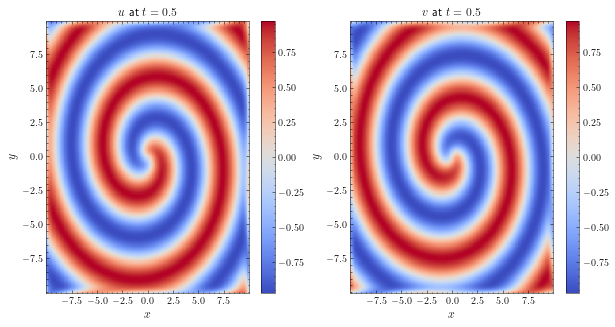

In [4]:
with plt.style.context(['science']):
    pylab.rcParams['figure.figsize'] = (10, 5)
    figure()
    xx, yy = meshgrid(x, y)
    subplot(1,2,1)
    assert u_sol[:,:,10].T.shape == (len(y), len(x))
    pcu = pcolor(xx,yy,u_sol[:,:,10].T,cmap='coolwarm')
    colorbar(pcu)
    title('$u$ at $t=0.5$', fontsize = 12)
    xticks(np.arange(-7.5, 10, 2.5))
    yticks(np.arange(-7.5, 10, 2.5))
    xlabel('$x$', fontsize = 12)
    ylabel('$y$', fontsize = 12)
    subplot(1,2,2)
    assert v_sol[:,:,10].T.shape == (len(y), len(x))
    pcv = pcolor(xx,yy,v_sol[:,:,10].T,cmap='coolwarm')
    colorbar(pcv)
    title('$v$ at $t=0.5$', fontsize = 12)
    xticks(np.arange(-7.5, 10, 2.5))
    yticks(np.arange(-7.5, 10, 2.5))
    xlabel('$x$', fontsize = 12)
    ylabel('$y$', fontsize = 12)
#     savefig("rd2d.png", dpi=300)

In [5]:
assert np.alltrue(rudy['u'] == real(data['u']))
assert np.alltrue(rudy['v'] == real(data['v']))

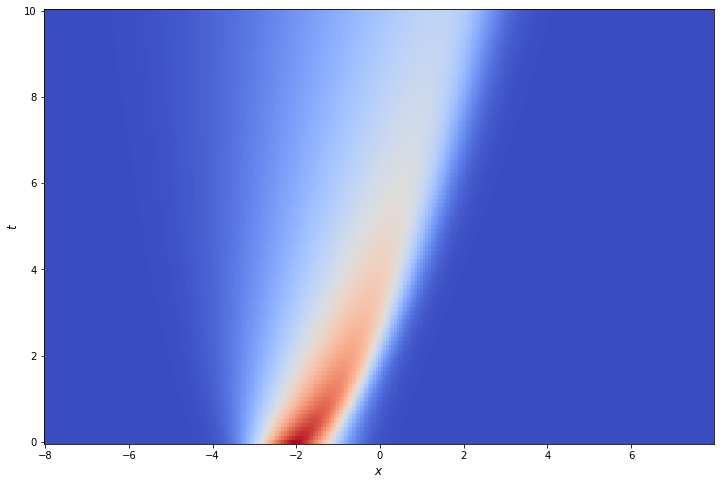

In [6]:
burgers = sio.loadmat("../Datasets/burgers.mat")
uu = burgers['usol'].real
xb = burgers['x'][0]
tb = burgers['t'][:, 0]
assert uu.T.shape == (len(tb), len(xb))
xb, tb = meshgrid(xb, tb)
pcolor(xb,tb,uu.T,cmap='coolwarm')
xlabel('$x$', fontsize = 12)
ylabel('$t$', fontsize = 12)
show()

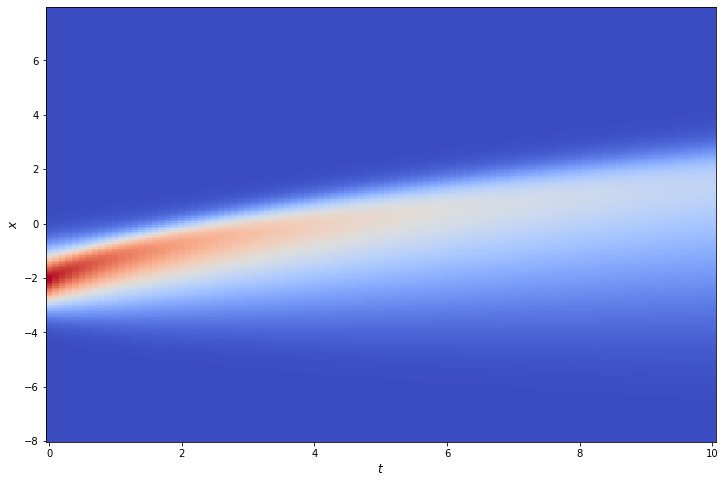

In [7]:
xb = burgers['x'][0]
tb = burgers['t'][:, 0]
assert uu.shape == (len(xb), len(tb))
tb, xb = meshgrid(tb, xb)
pcolor(tb, xb, uu, cmap='coolwarm')
xlabel('$t$', fontsize = 12)
ylabel('$x$', fontsize = 12)
show()